In [1]:
#!pwd

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing

sns.set_style('darkgrid')

threshold = 0.2

In [3]:
!ls -li ../../*.csv



76808487 -rw-rw-r-- 1 openuae openuae    1895 Jun 20 12:40 ../../19Jun22_bfr_Vs_after_removingOutliers_alldubai.csv
76808485 -rw-rw-r-- 1 openuae openuae  738762 Jun 20 14:24 ../../19Jun22_perMonth_outliersRemovedByRate.csv
76808488 -rw-rw-r-- 1 openuae openuae    1519 Jun 28 13:45 ../../28Apr_afteroutlier_T_consumption_alldubai.csv
76808610 -rw-rw-r-- 1 openuae openuae 1689689 Jun 28 17:54 ../../byRate_dataset_T_C_E_P_B.csv
76808496 -rw-rw-r-- 1 openuae openuae 1347164 Jun 28 17:54 ../../byRate_dataset_T_C_E_P.csv
76808492 -rw-rw-r-- 1 openuae openuae  848953 Jun 20 14:40 ../../Modified_19Jun22_perMonth_outliersRemovedByRate.csv


In [4]:
OriginalDataset = pd.read_csv('../../byRate_dataset_T_C_E_P_B.csv', index_col=0)
OriginalDataset = OriginalDataset[OriginalDataset.calendar_month < 202000]
OriginalDataset

,Key,calendar_month,community,year,totalConsumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,...,One Storey Building,Multi-Storey Building,Multi-Storey Ratio Building,Private Villa,Investment Villa,Arabic House,Public Building,Industrial Building,Other Buildings,Total Buildings
0,201706-111,201706,111.0,2017,1.628582e+06,39,0,0,0,0,...,0,2,0,0,0,0,4,0,0,6
1,201706-112,201706,112.0,2017,9.845628e+06,2800,16,0,0,0,...,0,204,0,0,0,12,185,0,0,401
2,201706-113,201706,113.0,2017,1.634600e+07,3428,12,0,0,0,...,0,307,0,0,0,21,55,0,0,383
3,201706-114,201706,114.0,2017,6.814790e+06,2760,2,0,0,0,...,0,174,0,0,0,1,157,0,0,332
4,201706-115,201706,115.0,2017,4.081415e+06,1241,0,0,0,0,...,0,73,0,0,0,0,33,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,201912-951,201912,951.0,2019,5.643080e+06,2,18,0,0,0,...,29,1,0,10,0,0,3,0,1,44
5924,201912-961,201912,961.0,2019,5.818540e+06,22,60,0,0,2,...,51,2,0,18,13,0,5,0,3,92
5925,201912-967,201912,967.0,2019,1.811282e+07,5,0,0,0,0,...,1,0,0,3,0,0,5,0,5,14
5926,201912-971,201912,971.0,2019,3.393695e+06,5,0,0,0,16,...,0,0,0,1,0,0,7,0,3,11


In [5]:
#OriginalDataset = OriginalDataset.drop(['Afr'], axis =1 )
OriginalDataset['month']= 1+(-1*np.cos((OriginalDataset['month']-1)*(2.*np.pi/12)))
OriginalDataset.iloc[0]

Key                              201706-111
calendar_month                       201706
community                             111.0
year                                   2017
totalConsumption               1628582.3335
NumOfConnected-COMMWTR                   39
NumOfConnected-RESINATW                   0
NumOfConnected-RESINATSW                  0
NumOfConnected-INDTWTR                    0
NumOfConnected-FREENRESIW                 0
NumOfConnected-GOVTWTR                    4
NumOfConnected-FREERESIW                  0
NumOfConnected-ENORATE                    0
NumOfConnected-TOTAL                     43
NumOfConnected-RESIEXPW                 0.0
month                              1.866025
Bfr_1                            201705-111
Bfr_3                            201703-111
Bfr_5                            201701-111
temp                                   36.6
prec                                    0.0
prec_days_1mm                             0
prec_days_0.1mm                 

## Remove unnecessary 

In [6]:
to_Exclude= ['prec_days_1mm', 'prec_days_0.1mm']
if "Community Name" in OriginalDataset.columns:
    to_Exclude.append("Community Name")
Dataset = OriginalDataset.drop(to_Exclude,  axis=1)
Dataset_key = Dataset.set_index('Key')

## Rename the remaining

In [7]:
columnsNames = {
  'community': 'communityID',
    "totalConsumption":"T_Consumption",
    "Holy_days":"No_of_OccDays", 
    "occasion":"Occasion", 
    "School or not":"SchoolExist",
    "days storm":"DaysStorm",
    "days fog":"DaysFog",
    "temp":"Temp",    
    "prec":"Prec",
    "One Storey Building":"No#_OneStoreyBuilding", 
    "Multi-Storey Building":"No#_Multi-StoreyBuilding", 
    "Multi-Storey Ratio Building":"No#_MultiStoreyRatioBuilding", 
    "Private Villa"  :"No#_Private_Villa", 
    'Other Buildings':"No#_OtherBuildings", 
    "Industrial Building":"No#_IndustrialBuilding", 
    "Investment Villa":"No#_InvestmentVilla", 
    'Arabic House'    :"No#_ArabicHouse", 
    'Public Building' :'No#_PublicBuilding',
    "Total Buildings" :"No#_TotalBuildings" 
}
Dataset = Dataset.rename(columns=columnsNames)
print(Dataset.shape)
print(Dataset.iloc[0])
Dataset.columns

(5928, 39)
Key                               201706-111
calendar_month                        201706
communityID                            111.0
year                                    2017
T_Consumption                   1628582.3335
NumOfConnected-COMMWTR                    39
NumOfConnected-RESINATW                    0
NumOfConnected-RESINATSW                   0
NumOfConnected-INDTWTR                     0
NumOfConnected-FREENRESIW                  0
NumOfConnected-GOVTWTR                     4
NumOfConnected-FREERESIW                   0
NumOfConnected-ENORATE                     0
NumOfConnected-TOTAL                      43
NumOfConnected-RESIEXPW                  0.0
month                               1.866025
Bfr_1                             201705-111
Bfr_3                             201703-111
Bfr_5                             201701-111
Temp                                    36.6
Prec                                     0.0
DaysStorm                                  0

Index(['Key', 'calendar_month', 'communityID', 'year', 'T_Consumption',
       'NumOfConnected-COMMWTR', 'NumOfConnected-RESINATW',
       'NumOfConnected-RESINATSW', 'NumOfConnected-INDTWTR',
       'NumOfConnected-FREENRESIW', 'NumOfConnected-GOVTWTR',
       'NumOfConnected-FREERESIW', 'NumOfConnected-ENORATE',
       'NumOfConnected-TOTAL', 'NumOfConnected-RESIEXPW', 'month', 'Bfr_1',
       'Bfr_3', 'Bfr_5', 'Temp', 'Prec', 'DaysStorm', 'DaysFog', 'SchoolExist',
       'WorkFromHome', 'Occasion', 'No_of_OccDays', 'Humidity', 'Population',
       'No#_OneStoreyBuilding', 'No#_Multi-StoreyBuilding',
       'No#_MultiStoreyRatioBuilding', 'No#_Private_Villa',
       'No#_InvestmentVilla', 'No#_ArabicHouse', 'No#_PublicBuilding',
       'No#_IndustrialBuilding', 'No#_OtherBuildings', 'No#_TotalBuildings'],
      dtype='object')

In [8]:
dataset_all = Dataset.copy()
dataset_all.calendar_month = pd.to_datetime(dataset_all.calendar_month,format= "%Y%m")
dataset_all

,Key,calendar_month,communityID,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,...,No#_OneStoreyBuilding,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings
0,201706-111,2017-06-01,111.0,2017,1.628582e+06,39,0,0,0,0,...,0,2,0,0,0,0,4,0,0,6
1,201706-112,2017-06-01,112.0,2017,9.845628e+06,2800,16,0,0,0,...,0,204,0,0,0,12,185,0,0,401
2,201706-113,2017-06-01,113.0,2017,1.634600e+07,3428,12,0,0,0,...,0,307,0,0,0,21,55,0,0,383
3,201706-114,2017-06-01,114.0,2017,6.814790e+06,2760,2,0,0,0,...,0,174,0,0,0,1,157,0,0,332
4,201706-115,2017-06-01,115.0,2017,4.081415e+06,1241,0,0,0,0,...,0,73,0,0,0,0,33,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,201912-951,2019-12-01,951.0,2019,5.643080e+06,2,18,0,0,0,...,29,1,0,10,0,0,3,0,1,44
5924,201912-961,2019-12-01,961.0,2019,5.818540e+06,22,60,0,0,2,...,51,2,0,18,13,0,5,0,3,92
5925,201912-967,2019-12-01,967.0,2019,1.811282e+07,5,0,0,0,0,...,1,0,0,3,0,0,5,0,5,14
5926,201912-971,2019-12-01,971.0,2019,3.393695e+06,5,0,0,0,16,...,0,0,0,1,0,0,7,0,3,11


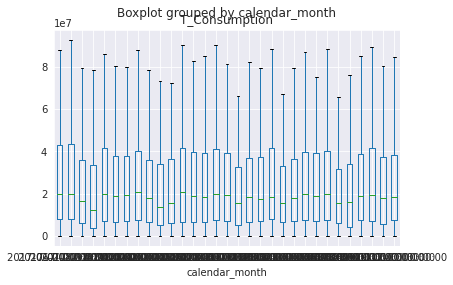

In [9]:
ax = dataset_all.boxplot(column='T_Consumption', by='calendar_month', showfliers=False, 
                positions=range(dataset_all.calendar_month.unique().shape[0]))


## Scalling data 

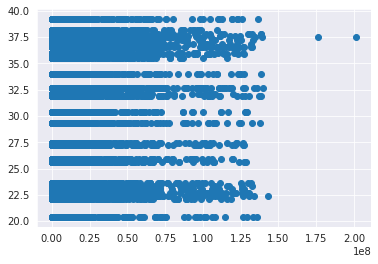

In [10]:
plt.scatter(dataset_all['T_Consumption'], dataset_all['Temp'])

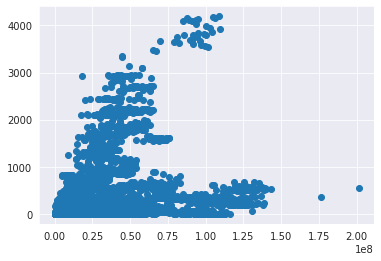

In [11]:
plt.scatter(dataset_all['T_Consumption'], dataset_all['NumOfConnected-RESINATW'])

Text(0.5, 1.0, 'Shows the general trend in all the communities')

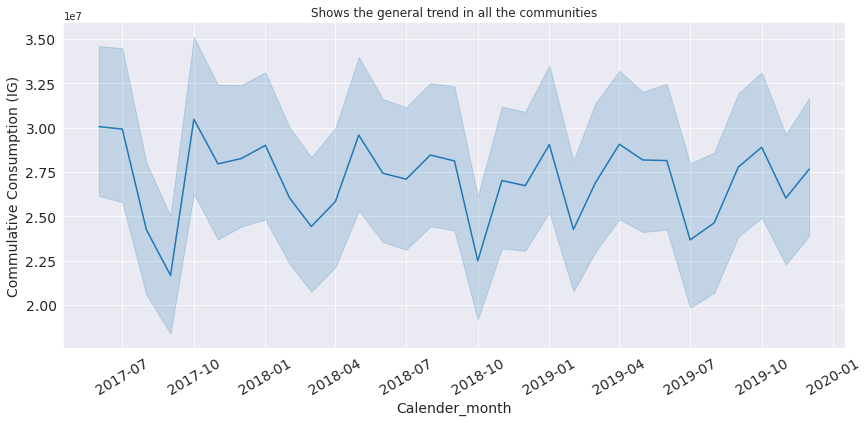

In [12]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.lineplot( x="calendar_month",y="T_Consumption", data=dataset_all, palette="Set3", ax=axe)
plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.xlabel("Calender_month", fontsize=14)
plt.ylabel("Commulative Consumption (IG)", fontsize=14)
plt.title('Shows the general trend in all the communities')

In [13]:
data_to_plot=dataset_all[["Key", "calendar_month", "T_Consumption"]]
data_to_plot=data_to_plot.groupby('calendar_month').sum().reset_index()
data_to_plot.head()

,calendar_month,T_Consumption
0,2017-06-01,5.500317e+09
1,2017-07-01,5.505112e+09
2,2017-08-01,4.459913e+09
3,2017-09-01,4.008513e+09
4,2017-10-01,5.637487e+09


Text(0.5, 1.0, 'Shows the general trend in all the communities')

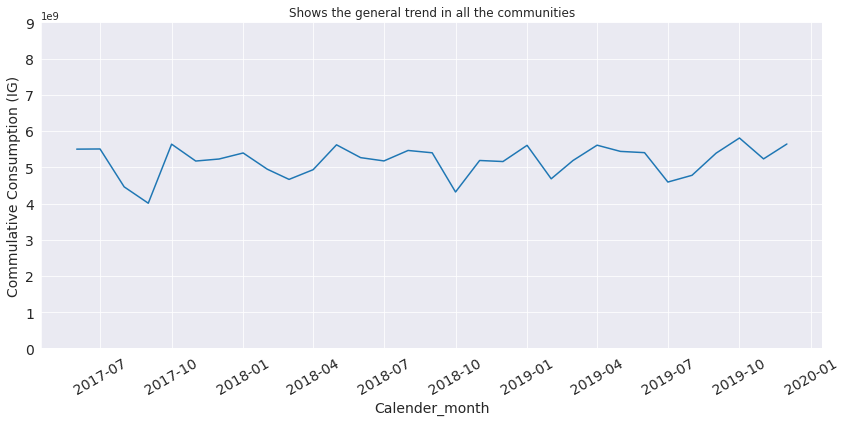

In [14]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.lineplot( x="calendar_month",y="T_Consumption", data=data_to_plot, palette="Set3", ax=axe)
plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.ylim(0, 9000000000)
plt.xlabel("Calender_month", fontsize=14)
plt.ylabel("Commulative Consumption (IG)", fontsize=14)
plt.title('Shows the general trend in all the communities')

Text(0.5, 0, 'Water Consumption (MG)')

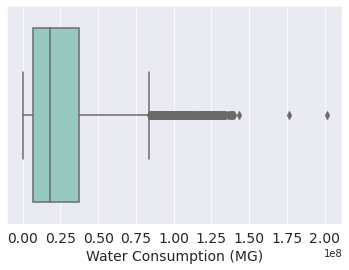

In [15]:
ax = sns.boxplot(x=dataset_all["T_Consumption"],palette="Set3")
#Now, removing the extreme values
ax.set(xlabel="Water Consumption (MG)")
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel("Water Consumption (MG)", fontsize=14)

In [16]:
#Removing the uper and lower 1% values
"""
q_low = dataset_all["T_Consumption"].quantile(0.01)
q_hi  = dataset_all["T_Consumption"].quantile(0.99)
q_hi
dataset_all_filtered = dataset_all[ ((dataset_all["T_Consumption"] < q_hi) 
                                       & (dataset_all["T_Consumption"] > q_low) )]
ax = sns.boxplot(x=dataset_all_filtered["T_Consumption"],palette="Set3")
ax.set(xlabel="Water Consumption (MG)")

plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel("Water Consumption (MG)", fontsize=14)
"""
dataset_all_filtered = dataset_all.copy()
dataset_all_filtered.shape

(5928, 39)

In [17]:
data_to_plot_2=dataset_all_filtered[["Key", "calendar_month", "T_Consumption"]]
data_to_plot_2=data_to_plot_2.groupby('calendar_month').sum().reset_index()
data_to_plot_2.rename(columns={'T_Consumption':'F_totalConsumption'}, inplace=True)
data_to_plot_2 =pd.merge(data_to_plot, data_to_plot_2, how='left', on='calendar_month')
data_to_plot_2= data_to_plot_2.set_index("calendar_month")
data_to_plot_2.to_csv('28Apr_afteroutlier_T_consumption_alldubai.csv')

Text(0, 0.5, 'Commulative Consumption (IG)')

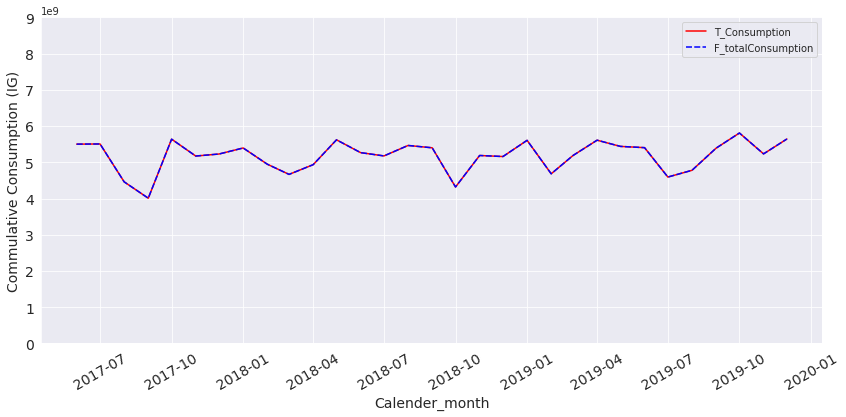

In [18]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.lineplot(  data=data_to_plot_2 , palette=['red', 'blue'], ax=axe)
plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.ylim(0,9000000000)
plt.xlabel("Calender_month", fontsize=14)
plt.ylabel("Commulative Consumption (IG)", fontsize=14)

## Data processing

In [19]:
dataset_all_filtered.columns

Index(['Key', 'calendar_month', 'communityID', 'year', 'T_Consumption',
       'NumOfConnected-COMMWTR', 'NumOfConnected-RESINATW',
       'NumOfConnected-RESINATSW', 'NumOfConnected-INDTWTR',
       'NumOfConnected-FREENRESIW', 'NumOfConnected-GOVTWTR',
       'NumOfConnected-FREERESIW', 'NumOfConnected-ENORATE',
       'NumOfConnected-TOTAL', 'NumOfConnected-RESIEXPW', 'month', 'Bfr_1',
       'Bfr_3', 'Bfr_5', 'Temp', 'Prec', 'DaysStorm', 'DaysFog', 'SchoolExist',
       'WorkFromHome', 'Occasion', 'No_of_OccDays', 'Humidity', 'Population',
       'No#_OneStoreyBuilding', 'No#_Multi-StoreyBuilding',
       'No#_MultiStoreyRatioBuilding', 'No#_Private_Villa',
       'No#_InvestmentVilla', 'No#_ArabicHouse', 'No#_PublicBuilding',
       'No#_IndustrialBuilding', 'No#_OtherBuildings', 'No#_TotalBuildings'],
      dtype='object')

In [20]:
dataset_all_filtered.T_Consumption.describe()

count    5.928000e+03
mean     2.705887e+07
std      2.861137e+07
min      1.000000e+01
25%      6.645087e+06
50%      1.800702e+07
75%      3.749328e+07
max      2.014831e+08
Name: T_Consumption, dtype: float64

In [21]:
dataset_all_scalled = dataset_all_filtered.copy()
dataset_all_scalled.replace({"Occasion": {'Ramadan ': 3, 'Eid': 2, '0':1}}, inplace=True)

col_names_withScaledData =[
 'T_Consumption',
 'NumOfConnected-COMMWTR',
 'NumOfConnected-RESINATW',
 'NumOfConnected-RESIEXPW',
 'NumOfConnected-RESINATSW',
 'NumOfConnected-INDTWTR',
 'NumOfConnected-FREENRESIW',
 'NumOfConnected-GOVTWTR',
 'NumOfConnected-FREERESIW',
 'NumOfConnected-TOTAL',
 'Temp',
 'Prec',
 'SchoolExist',
 'WorkFromHome',
 'Occasion',
 'Humidity',
]
if ('Population' in dataset_all_scalled.columns):
    col_names_withScaledData.append('Population')
    
extra_Cols = ['No#_OneStoreyBuilding',
 'No#_Multi-StoreyBuilding',
 'No#_MultiStoreyRatioBuilding',
 'No#_Private_Villa',
 'No#_InvestmentVilla',
 'No#_ArabicHouse',
 'No#_PublicBuilding',
 'No#_IndustrialBuilding',
 'No#_OtherBuildings',
 'No#_TotalBuildings']
if ('No#_OneStoreyBuilding' in dataset_all_scalled.columns):
    for i in extra_Cols:
        col_names_withScaledData.append(i)
col_names_withScaledData

col_names_withDaysData=[
    'DaysStorm',
     'DaysFog',
    'No_of_OccDays',]

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

for col in col_names_withScaledData:
    dataset_all_scalled[[col]] =  min_max_scaler.fit_transform(dataset_all_scalled[[col]])

for col in col_names_withDaysData:
    dataset_all_scalled[[col]] = dataset_all_scalled[[col]]/30

dataset_all_scalled.head()

,Key,calendar_month,communityID,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,...,No#_OneStoreyBuilding,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings
0,201706-111,2017-06-01,111.0,2017,0.008083,0.003158,0.000000,0.0,0.0,0.0,...,0.0,0.002809,0.0,0.0,0.0,0.000000,0.006757,0.0,0.0,0.000634
1,201706-112,2017-06-01,112.0,2017,0.048866,0.226739,0.003815,0.0,0.0,0.0,...,0.0,0.286517,0.0,0.0,0.0,0.013274,0.312500,0.0,0.0,0.042353
2,201706-113,2017-06-01,113.0,2017,0.081128,0.277593,0.002861,0.0,0.0,0.0,...,0.0,0.431180,0.0,0.0,0.0,0.023230,0.092905,0.0,0.0,0.040452
3,201706-114,2017-06-01,114.0,2017,0.033823,0.223500,0.000477,0.0,0.0,0.0,...,0.0,0.244382,0.0,0.0,0.0,0.001106,0.265203,0.0,0.0,0.035065
4,201706-115,2017-06-01,115.0,2017,0.020257,0.100494,0.000000,0.0,0.0,0.0,...,0.0,0.102528,0.0,0.0,0.0,0.000000,0.055743,0.0,0.0,0.011196


In [22]:
list(dataset_all_scalled.columns)

['Key',
 'calendar_month',
 'communityID',
 'year',
 'T_Consumption',
 'NumOfConnected-COMMWTR',
 'NumOfConnected-RESINATW',
 'NumOfConnected-RESINATSW',
 'NumOfConnected-INDTWTR',
 'NumOfConnected-FREENRESIW',
 'NumOfConnected-GOVTWTR',
 'NumOfConnected-FREERESIW',
 'NumOfConnected-ENORATE',
 'NumOfConnected-TOTAL',
 'NumOfConnected-RESIEXPW',
 'month',
 'Bfr_1',
 'Bfr_3',
 'Bfr_5',
 'Temp',
 'Prec',
 'DaysStorm',
 'DaysFog',
 'SchoolExist',
 'WorkFromHome',
 'Occasion',
 'No_of_OccDays',
 'Humidity',
 'Population',
 'No#_OneStoreyBuilding',
 'No#_Multi-StoreyBuilding',
 'No#_MultiStoreyRatioBuilding',
 'No#_Private_Villa',
 'No#_InvestmentVilla',
 'No#_ArabicHouse',
 'No#_PublicBuilding',
 'No#_IndustrialBuilding',
 'No#_OtherBuildings',
 'No#_TotalBuildings']

In [23]:
columnsLeft = ['calendar_month', 'communityID', 'year', 'month']

dataset_all_scalled[columnsLeft].describe()

,communityID,year,month
count,5928.000000,5928.000000,5928.000000
mean,444.708165,2018.177800,1.056504
std,235.944170,0.762788,0.709616
min,101.000000,2017.000000,0.000000
25%,265.000000,2018.000000,0.500000
50%,367.000000,2018.000000,1.000000
75%,624.000000,2019.000000,1.866025
max,981.000000,2019.000000,2.000000


In [24]:
dataset_all_scalled[columnsLeft]

,calendar_month,communityID,year,month
0,2017-06-01,111.0,2017,1.866025
1,2017-06-01,112.0,2017,1.866025
2,2017-06-01,113.0,2017,1.866025
3,2017-06-01,114.0,2017,1.866025
4,2017-06-01,115.0,2017,1.866025
...,...,...,...,...
5923,2019-12-01,951.0,2019,0.133975
5924,2019-12-01,961.0,2019,0.133975
5925,2019-12-01,967.0,2019,0.133975
5926,2019-12-01,971.0,2019,0.133975


In [25]:
dataset_all_scalled.dtypes

Key                                     object
calendar_month                  datetime64[ns]
communityID                            float64
year                                     int64
T_Consumption                          float64
NumOfConnected-COMMWTR                 float64
NumOfConnected-RESINATW                float64
NumOfConnected-RESINATSW               float64
NumOfConnected-INDTWTR                 float64
NumOfConnected-FREENRESIW              float64
NumOfConnected-GOVTWTR                 float64
NumOfConnected-FREERESIW               float64
NumOfConnected-ENORATE                   int64
NumOfConnected-TOTAL                   float64
NumOfConnected-RESIEXPW                float64
month                                  float64
Bfr_1                                   object
Bfr_3                                   object
Bfr_5                                   object
Temp                                   float64
Prec                                   float64
DaysStorm    

In [26]:
dataset_all_scalled

,Key,calendar_month,communityID,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,...,No#_OneStoreyBuilding,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings
0,201706-111,2017-06-01,111.0,2017,0.008083,0.003158,0.000000,0.0,0.0,0.000000,...,0.000000,0.002809,0.0,0.000000,0.000000,0.000000,0.006757,0.0,0.000000,0.000634
1,201706-112,2017-06-01,112.0,2017,0.048866,0.226739,0.003815,0.0,0.0,0.000000,...,0.000000,0.286517,0.0,0.000000,0.000000,0.013274,0.312500,0.0,0.000000,0.042353
2,201706-113,2017-06-01,113.0,2017,0.081128,0.277593,0.002861,0.0,0.0,0.000000,...,0.000000,0.431180,0.0,0.000000,0.000000,0.023230,0.092905,0.0,0.000000,0.040452
3,201706-114,2017-06-01,114.0,2017,0.033823,0.223500,0.000477,0.0,0.0,0.000000,...,0.000000,0.244382,0.0,0.000000,0.000000,0.001106,0.265203,0.0,0.000000,0.035065
4,201706-115,2017-06-01,115.0,2017,0.020257,0.100494,0.000000,0.0,0.0,0.000000,...,0.000000,0.102528,0.0,0.000000,0.000000,0.000000,0.055743,0.0,0.000000,0.011196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,201912-951,2019-12-01,951.0,2019,0.028008,0.000162,0.004292,0.0,0.0,0.000000,...,0.136792,0.001404,0.0,0.003973,0.000000,0.000000,0.005068,0.0,0.002053,0.004647
5924,201912-961,2019-12-01,961.0,2019,0.028879,0.001782,0.014306,0.0,0.0,0.083333,...,0.240566,0.002809,0.0,0.007151,0.001565,0.000000,0.008446,0.0,0.006160,0.009717
5925,201912-967,2019-12-01,967.0,2019,0.089897,0.000405,0.000000,0.0,0.0,0.000000,...,0.004717,0.000000,0.0,0.001192,0.000000,0.000000,0.008446,0.0,0.010267,0.001479
5926,201912-971,2019-12-01,971.0,2019,0.016844,0.000405,0.000000,0.0,0.0,0.666667,...,0.000000,0.000000,0.0,0.000397,0.000000,0.000000,0.011824,0.0,0.006160,0.001162


## Add the previous consumption 


In [27]:
dataset_all_scalled_work =  dataset_all_scalled.set_index('Key')
dataset_all_scalled_work

,calendar_month,communityID,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,NumOfConnected-GOVTWTR,...,No#_OneStoreyBuilding,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings
Key,,,,,,,,,,,,,,,,,,,,,
201706-111,2017-06-01,111.0,2017,0.008083,0.003158,0.000000,0.0,0.0,0.000000,0.042553,...,0.000000,0.002809,0.0,0.000000,0.000000,0.000000,0.006757,0.0,0.000000,0.000634
201706-112,2017-06-01,112.0,2017,0.048866,0.226739,0.003815,0.0,0.0,0.000000,0.212766,...,0.000000,0.286517,0.0,0.000000,0.000000,0.013274,0.312500,0.0,0.000000,0.042353
201706-113,2017-06-01,113.0,2017,0.081128,0.277593,0.002861,0.0,0.0,0.000000,0.000000,...,0.000000,0.431180,0.0,0.000000,0.000000,0.023230,0.092905,0.0,0.000000,0.040452
201706-114,2017-06-01,114.0,2017,0.033823,0.223500,0.000477,0.0,0.0,0.000000,0.063830,...,0.000000,0.244382,0.0,0.000000,0.000000,0.001106,0.265203,0.0,0.000000,0.035065
201706-115,2017-06-01,115.0,2017,0.020257,0.100494,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.102528,0.0,0.000000,0.000000,0.000000,0.055743,0.0,0.000000,0.011196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912-951,2019-12-01,951.0,2019,0.028008,0.000162,0.004292,0.0,0.0,0.000000,0.021277,...,0.136792,0.001404,0.0,0.003973,0.000000,0.000000,0.005068,0.0,0.002053,0.004647
201912-961,2019-12-01,961.0,2019,0.028879,0.001782,0.014306,0.0,0.0,0.083333,0.095745,...,0.240566,0.002809,0.0,0.007151,0.001565,0.000000,0.008446,0.0,0.006160,0.009717
201912-967,2019-12-01,967.0,2019,0.089897,0.000405,0.000000,0.0,0.0,0.000000,0.053191,...,0.004717,0.000000,0.0,0.001192,0.000000,0.000000,0.008446,0.0,0.010267,0.001479


In [28]:
bfr_values = dataset_all_scalled_work.Bfr_1.values
prevConsump = []
for i in bfr_values:
    value = None
    try:
        value = dataset_all_scalled_work.loc[i, 'T_Consumption']
    except:
        pass
    prevConsump.append(value)
    
dataset_all_scalled_work['preConsump_1'] = prevConsump

In [29]:
bfr_values = dataset_all_scalled_work.Bfr_3.values
prevConsump = []
for i in bfr_values:
    value = None
    try:
        value = dataset_all_scalled_work.loc[i, 'T_Consumption']
    except:
        pass
    prevConsump.append(value)
    
#dataset_all_scalled_work['preConsump_3'] = prevConsump

In [30]:
bfr_values = dataset_all_scalled_work.Bfr_5.values
prevConsump = []
for i in bfr_values:
    value = None
    try:
        value = dataset_all_scalled_work.loc[i, 'T_Consumption']
    except:
        pass
    prevConsump.append(value)
    
#dataset_all_scalled_work['preConsump_5'] = prevConsump

In [31]:
dataset_all_scalled_ready = dataset_all_scalled_work[~dataset_all_scalled_work.preConsump_1.isna()]
#dataset_all_scalled_ready = dataset_all_scalled_ready[~dataset_all_scalled_ready.preConsump_3.isna()]
#dataset_all_scalled_ready = dataset_all_scalled_ready[~dataset_all_scalled_ready.preConsump_5.isna()]

In [32]:
dataset_all_scalled_ready.calendar_month

Key
201707-111   2017-07-01
201707-112   2017-07-01
201707-113   2017-07-01
201707-114   2017-07-01
201707-115   2017-07-01
                ...    
201912-951   2019-12-01
201912-961   2019-12-01
201912-967   2019-12-01
201912-971   2019-12-01
201912-981   2019-12-01
Name: calendar_month, Length: 5716, dtype: datetime64[ns]

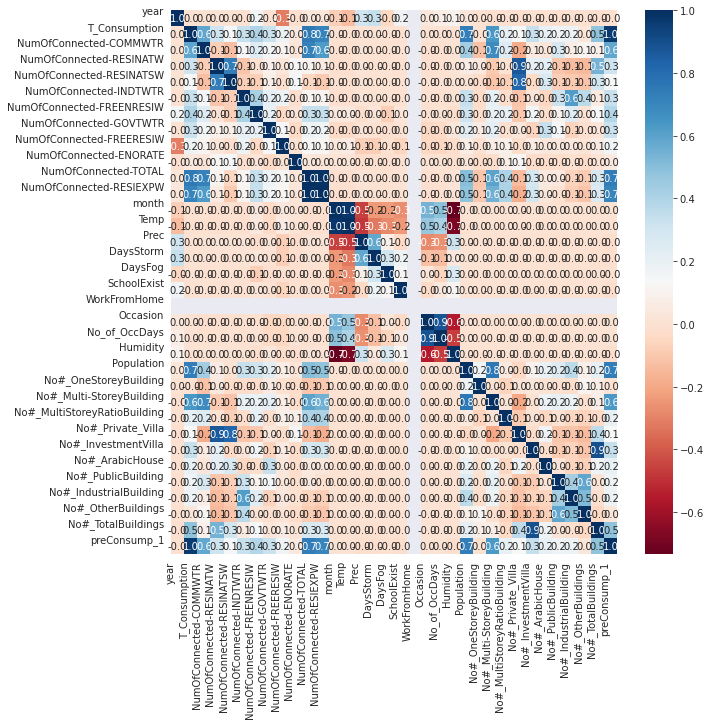

In [33]:
dataset_all_scalled = dataset_all_scalled_ready.drop(['communityID', 'Bfr_1', 'Bfr_3', 'Bfr_5'],axis = 1)

corr = dataset_all_scalled.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".1f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [34]:
listCorr = abs(corr["T_Consumption"])
listCorr.sort_values()

No#_OneStoreyBuilding           0.000247
year                            0.001696
DaysFog                         0.002036
Occasion                        0.002578
Prec                            0.002701
Humidity                        0.002887
SchoolExist                     0.003440
No_of_OccDays                   0.004363
Temp                            0.005152
DaysStorm                       0.005320
month                           0.005472
No#_OtherBuildings              0.026729
NumOfConnected-ENORATE          0.044706
No#_Private_Villa               0.135028
NumOfConnected-RESINATSW        0.143660
No#_PublicBuilding              0.168340
No#_IndustrialBuilding          0.176140
NumOfConnected-FREERESIW        0.176725
No#_ArabicHouse                 0.202006
No#_MultiStoreyRatioBuilding    0.202166
NumOfConnected-RESINATW         0.312069
NumOfConnected-GOVTWTR          0.327663
NumOfConnected-INDTWTR          0.333400
No#_InvestmentVilla             0.335904
NumOfConnected-F

In [35]:
X = dataset_all_scalled.loc[:, dataset_all_scalled.columns != 'T_Consumption']  #independent columns
X = X.loc[:, X.columns != 'calendar_month']
y = dataset_all_scalled['T_Consumption']    #target column i.e price range
print(X.shape)
print(y.shape)
print(X.dtypes)

(5716, 33)
(5716,)
year                              int64
NumOfConnected-COMMWTR          float64
NumOfConnected-RESINATW         float64
NumOfConnected-RESINATSW        float64
NumOfConnected-INDTWTR          float64
NumOfConnected-FREENRESIW       float64
NumOfConnected-GOVTWTR          float64
NumOfConnected-FREERESIW        float64
NumOfConnected-ENORATE            int64
NumOfConnected-TOTAL            float64
NumOfConnected-RESIEXPW         float64
month                           float64
Temp                            float64
Prec                            float64
DaysStorm                       float64
DaysFog                         float64
SchoolExist                     float64
WorkFromHome                    float64
Occasion                        float64
No_of_OccDays                   float64
Humidity                        float64
Population                      float64
No#_OneStoreyBuilding           float64
No#_Multi-StoreyBuilding        float64
No#_MultiStoreyRatioB

In [36]:
dataset_all_scalled

,calendar_month,year,T_Consumption,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-RESINATSW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,NumOfConnected-GOVTWTR,NumOfConnected-FREERESIW,...,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_Private_Villa,No#_InvestmentVilla,No#_ArabicHouse,No#_PublicBuilding,No#_IndustrialBuilding,No#_OtherBuildings,No#_TotalBuildings,preConsump_1
Key,,,,,,,,,,,,,,,,,,,,,
201707-111,2017-07-01,2017,0.007362,0.002996,0.000000,0.0,0.0,0.000000,0.042553,0.000000,...,0.002809,0.0,0.000000,0.000000,0.000000,0.006757,0.0,0.000000,0.000634,0.008083
201707-112,2017-07-01,2017,0.047473,0.223176,0.003815,0.0,0.0,0.000000,0.212766,0.000000,...,0.286517,0.0,0.000000,0.000000,0.013274,0.312500,0.0,0.000000,0.042353,0.048866
201707-113,2017-07-01,2017,0.077180,0.279375,0.002861,0.0,0.0,0.000000,0.000000,0.083333,...,0.431180,0.0,0.000000,0.000000,0.023230,0.092905,0.0,0.000000,0.040452,0.081128
201707-114,2017-07-01,2017,0.033785,0.198235,0.000715,0.0,0.0,0.000000,0.063830,0.000000,...,0.244382,0.0,0.000000,0.000000,0.001106,0.265203,0.0,0.000000,0.035065,0.033823
201707-115,2017-07-01,2017,0.020618,0.100413,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.102528,0.0,0.000000,0.000000,0.000000,0.055743,0.0,0.000000,0.011196,0.020257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912-951,2019-12-01,2019,0.028008,0.000162,0.004292,0.0,0.0,0.000000,0.021277,0.000000,...,0.001404,0.0,0.003973,0.000000,0.000000,0.005068,0.0,0.002053,0.004647,0.028268
201912-961,2019-12-01,2019,0.028879,0.001782,0.014306,0.0,0.0,0.083333,0.095745,0.000000,...,0.002809,0.0,0.007151,0.001565,0.000000,0.008446,0.0,0.006160,0.009717,0.027934
201912-967,2019-12-01,2019,0.089897,0.000405,0.000000,0.0,0.0,0.000000,0.053191,0.000000,...,0.000000,0.0,0.001192,0.000000,0.000000,0.008446,0.0,0.010267,0.001479,0.001040


In [37]:
#Correlation with output variable
cor_target = abs(corr["T_Consumption"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=threshold]  # 0.2 is the threshold 
print(relevant_features.index)
heads_chosen = list(relevant_features.index)
final_dataset  = dataset_all_scalled[heads_chosen].copy()

Index(['T_Consumption', 'NumOfConnected-COMMWTR', 'NumOfConnected-RESINATW',
       'NumOfConnected-INDTWTR', 'NumOfConnected-FREENRESIW',
       'NumOfConnected-GOVTWTR', 'NumOfConnected-TOTAL',
       'NumOfConnected-RESIEXPW', 'Population', 'No#_Multi-StoreyBuilding',
       'No#_MultiStoreyRatioBuilding', 'No#_InvestmentVilla',
       'No#_ArabicHouse', 'No#_TotalBuildings', 'preConsump_1'],
      dtype='object')


In [38]:
X = final_dataset.drop(["T_Consumption"], axis=1)
y = final_dataset[["T_Consumption"]].values.reshape(-1,1)

In [39]:
X

,NumOfConnected-COMMWTR,NumOfConnected-RESINATW,NumOfConnected-INDTWTR,NumOfConnected-FREENRESIW,NumOfConnected-GOVTWTR,NumOfConnected-TOTAL,NumOfConnected-RESIEXPW,Population,No#_Multi-StoreyBuilding,No#_MultiStoreyRatioBuilding,No#_InvestmentVilla,No#_ArabicHouse,No#_TotalBuildings,preConsump_1
Key,,,,,,,,,,,,,,
201707-111,0.002996,0.000000,0.0,0.000000,0.042553,0.000565,0.000000,0.007338,0.002809,0.0,0.000000,0.000000,0.000634,0.008083
201707-112,0.223176,0.003815,0.0,0.000000,0.212766,0.067857,0.031301,0.029140,0.286517,0.0,0.000000,0.013274,0.042353,0.048866
201707-113,0.279375,0.002861,0.0,0.000000,0.000000,0.090269,0.045527,0.065889,0.431180,0.0,0.000000,0.023230,0.040452,0.081128
201707-114,0.198235,0.000715,0.0,0.000000,0.063830,0.050081,0.016934,0.011399,0.244382,0.0,0.000000,0.001106,0.035065,0.033823
201707-115,0.100413,0.000000,0.0,0.000000,0.000000,0.025606,0.008919,0.014725,0.102528,0.0,0.000000,0.000000,0.011196,0.020257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912-951,0.000162,0.004292,0.0,0.000000,0.021277,0.000297,0.000000,0.002903,0.001404,0.0,0.000000,0.000000,0.004647,0.028268
201912-961,0.001782,0.014306,0.0,0.083333,0.095745,0.001357,0.000062,0.003253,0.002809,0.0,0.001565,0.000000,0.009717,0.027934
201912-967,0.000405,0.000000,0.0,0.000000,0.053191,0.000127,0.000000,0.000034,0.000000,0.0,0.000000,0.000000,0.001479,0.001040


In [40]:
y

array([[0.00736206],
       [0.04747315],
       [0.07717957],
       ...,
       [0.08989743],
       [0.01684353],
       [0.00781228]])

In [41]:
# Splitting the dataset into the Training set and Test set
## Here we have two ways, Either Go RANDOM or SEQUENTIAL SPLIT
from sklearn.model_selection import train_test_split
split_method="ordered"
if (split_method=="random"):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
else:
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, shuffle=False)

In [42]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (4001, 14)
Shape of X_test:  (1715, 14)
Shape of y_train:  (4001, 1)
Shape of y_test (1715, 1)


In [43]:
from xgboost import XGBClassifier
import xgboost as xgb

In [44]:
import timeit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from datetime import datetime
from sklearn.metrics import r2_score

In [45]:
# Fitting the Random Forest Regression to the dataset
def train_bias_model(Xtr, ytr_pred, ytr):
    ytrErr = ytr - ytr_pred
    print("train_bias_model - Shape of new y_pred" , ytrErr.shape)
    reg_rf =  xgb.XGBRegressor(objective ='reg:squarederror', 
                          #colsample_bytree = 0.3,
                          learning_rate = 0.01,
                          max_depth = 5, 
                          alpha = 10,
                          n_estimators = 1000)
    reg_rf.fit(Xtr, ytrErr.ravel())
    return reg_rf


def testAllModel(actModel, trainedBias, Xts, yts,reshapeACTMODEL = False):
    y_pred=actModel.predict(Xts)
    y_pred_biases = trainedBias.predict(Xts)
    print("testAllModel  ", y_pred.shape, yts.shape, y_pred_biases.shape)
    y_corrected = y_pred_biases  +  y_pred.reshape(1,-1)
    return y_corrected.reshape(-1,1)

In [46]:
def evaluate(y_act,y_pred):
    # Predicting R2 Score the Test set results
    r2_score_test = r2_score(y_act, y_pred)
    # Predicting RMSE the Test set results
    rmse =  (np.sqrt(mean_squared_error(y_act,y_pred)))
    mae = mean_absolute_error(y_act,y_pred)
    med_ae= median_absolute_error(y_act,y_pred)
    mape = mean_absolute_percentage_error(y_act,y_pred)
    print('R2_score: ', r2_score_test, "RMSE: ", rmse, "MAE: ", mae,"MED_AE: ", med_ae,   "MAPE: ", mape) 
    return r2_score_test, rmse, mae, med_ae, mape 

## Optimization - GBR

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

#train_gbr
param_grid = {
    "max_depth" :[1,3,6,10,15,20,50,100],
    "max_leaf_nodes" :[2, 5, 10, 15,20, None],
    'min_samples_split':[2, 5, 10, 15,20],
    "n_estimators" : [1, 50, 100, 200, 500],
    "learning_rate" :[0.001,0.005, 0.01,0.05,0.1] ,
    "alpha": [0.1,0.3,0.5,0.7,0.9]
}



cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
reg_xgb =  GradientBoostingRegressor()

clf = RandomizedSearchCV(reg_xgb, param_distributions = param_grid, random_state= False, verbose=3, n_iter = 10, cv = 5)
search = clf.fit(X_train, y_train.ravel())
search.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha=0.1, learning_rate=0.01, max_depth=6, max_leaf_nodes=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV 2/5] END alpha=0.1, learning_rate=0.01, max_depth=6, max_leaf_nodes=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV 3/5] END alpha=0.1, learning_rate=0.01, max_depth=6, max_leaf_nodes=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV 4/5] END alpha=0.1, learning_rate=0.01, max_depth=6, max_leaf_nodes=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV 5/5] END alpha=0.1, learning_rate=0.01, max_depth=6, max_leaf_nodes=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV 1/5] END alpha=0.3, learning_rate=0.05, max_depth=100, max_leaf_nodes=None, min_samples_split=20, n_estimators=500; total time=  47.2s
[CV 2/5] END alpha=0.3, learning_rate=0.05, max_depth=100, max_leaf_nodes=None, min_samples_split=20, n_estimators=500; total time=  48

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_leaf_nodes': 10,
 'max_depth': 15,
 'learning_rate': 0.05,
 'alpha': 0.7}

## Optimization - NN

In [57]:
#from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit

#train_nn

param_grid = {
    "hidden_layer_sizes":[],
    "alpha":[0.001,0.005,0.01, 0.05,0.1],
    "max_iter":[50, 100, 500, 1000, 2000], 
    "n_iter_no_change": [5, 10, 25, 50, 100,200,500],
    "hidden_layer_sizes":[(300,150,150), (300,150,50),(150,100,50), 
                         (150,100,100),(100,50,50),(300,200,100),(30,15,5),]
}


cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
reg_xgb = MLPRegressor()

clf = RandomizedSearchCV(reg_xgb, param_grid, random_state= False, n_iter = 10, verbose=3, cv = 5)
search = clf.fit(X_train, y_train.ravel())
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha=0.01, hidden_layer_sizes=(300, 200, 100), max_iter=500, n_iter_no_change=200; total time=  14.8s
[CV 2/5] END alpha=0.01, hidden_layer_sizes=(300, 200, 100), max_iter=500, n_iter_no_change=200; total time=  15.3s
[CV 3/5] END alpha=0.01, hidden_layer_sizes=(300, 200, 100), max_iter=500, n_iter_no_change=200; total time=  14.9s
[CV 4/5] END alpha=0.01, hidden_layer_sizes=(300, 200, 100), max_iter=500, n_iter_no_change=200; total time=  15.9s
[CV 5/5] END alpha=0.01, hidden_layer_sizes=(300, 200, 100), max_iter=500, n_iter_no_change=200; total time=  15.2s
[CV 1/5] END alpha=0.01, hidden_layer_sizes=(300, 150, 50), max_iter=2000, n_iter_no_change=500; total time=  27.8s
[CV 2/5] END alpha=0.01, hidden_layer_sizes=(300, 150, 50), max_iter=2000, n_iter_no_change=500; total time=  27.4s
[CV 3/5] END alpha=0.01, hidden_layer_sizes=(300, 150, 50), max_iter=2000, n_iter_no_change=500; total time=  27.6s
[CV 4/5] EN

/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=100; total time=   1.7s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=100; total time=   1.8s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=100; total time=   1.8s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=100; total time=   1.8s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=100; total time=   1.7s
[CV 1/5] END alpha=0.1, hidden_layer_sizes=(150, 100, 100), max_iter=100, n_iter_no_change=25; total time=   1.8s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.1, hidden_layer_sizes=(150, 100, 100), max_iter=100, n_iter_no_change=25; total time=   3.4s
[CV 3/5] END alpha=0.1, hidden_layer_sizes=(150, 100, 100), max_iter=100, n_iter_no_change=25; total time=   2.9s
[CV 4/5] END alpha=0.1, hidden_layer_sizes=(150, 100, 100), max_iter=100, n_iter_no_change=25; total time=   2.5s
[CV 5/5] END alpha=0.1, hidden_layer_sizes=(150, 100, 100), max_iter=100, n_iter_no_change=25; total time=   2.8s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=200; total time=   1.7s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=200; total time=   1.8s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=200; total time=   1.8s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=200; total time=   1.8s


/home/openuae/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(150, 100, 100), max_iter=50, n_iter_no_change=200; total time=   1.8s


{'n_iter_no_change': 100,
 'max_iter': 2000,
 'hidden_layer_sizes': (300, 150, 150),
 'alpha': 0.005}

## Optimize LGBM

In [60]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

#train_lgb
param_grid = {
    'boosting_type': ['gbdt', 'rf', 'dart', 'goss'],
    "num_leaves" :[2, 5, 10, 20, 31],# <<
    "max_depth" :[-1,2,5,10,20], 
    'objective': ['regression'],
    "learning_rate" :[0.001,0.01,0.1,0.5],
    "feature_fraction":[0.2,0.4,0.6,0.8,1], #<<
    "min_split_gain":[0,10, 20,30,40,50],
    "bagging_fraction":[0.2,0.4,0.6,0.8,1],
    "bagging_freq" :  [1,10, 20,30,40,50, 100],
}
    
#cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
reg_xgb = lgb.LGBMRegressor()
clf = RandomizedSearchCV(reg_xgb, param_grid, random_state= False, verbose=3, cv = 5)
search = clf.fit(X_train, y_train.ravel())

search.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_freq is set=40, subsample_freq=0 will be ignored. Current value: bagging_freq=40
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[CV 1/5] END bagging_fraction=0.8, bagging_freq=40, boosting_type=rf, feature_fraction=1, learning_rate=0.1, max_depth=-1, min_split_gain=20, num_leaves=5, objective=regression; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_freq is set=40, subsample_freq=0 will be ignored. Current value: bagging_freq=40
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[CV 2/5] END bagging_fraction=0.8, bagging_freq=

/home/openuae/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/openuae/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/openuae/.local/lib/python3.8/site-packages/lightgbm/sklearn.py", line 818, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "/home/openuae/.local/lib/python3.8/site-packages/lightgbm/sklearn.py", line 683, in fit
    self._Booster = train(params, train_set,
  File "/home/openuae/.local/lib/python3.8/site-packages/lightgbm/engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "/home/openuae/.local/lib/python3.8/site-packages/lightgbm/basic.py", line 2234, in __init__


[CV 4/5] END bagging_fraction=0.4, bagging_freq=50, boosting_type=dart, feature_fraction=0.8, learning_rate=0.5, max_depth=5, min_split_gain=10, num_leaves=2, objective=regression; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[CV 5/5] END bagging_fraction=0.4, bagging_freq=50, boosting_type=dart, feature_fraction=0.8, learning_rate=0.5, max_depth=5, min_split_gain=10, num_leaves=2, objective=regression; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [War

[CV 4/5] END bagging_fraction=0.4, bagging_freq=30, boosting_type=gbdt, feature_fraction=1, learning_rate=0.01, max_depth=-1, min_split_gain=50, num_leaves=31, objective=regression; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_freq is set=30, subsample_freq=0 will be ignored. Current value: bagging_freq=30
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[CV 5/5] END bagging_fraction=0.4, bagging_freq=30, boosting_type=gbdt, feature_fraction=1, learning_rate=0.01, max_depth=-1, min_split_gain=50, num_leaves=31, objective=regression; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning

/home/openuae/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 4.49369444e-01             nan -1.14965114e+00  9.50675002e-01
 -9.21207254e-04 -9.08266562e-01 -9.21207254e-04 -9.21207254e-04
  2.14612096e-01 -7.98269841e-01]
  warnings.warn(


{'objective': 'regression',
 'num_leaves': 20,
 'min_split_gain': 0,
 'max_depth': 2,
 'learning_rate': 0.5,
 'feature_fraction': 0.4,
 'boosting_type': 'goss',
 'bagging_freq': 10,
 'bagging_fraction': 1}

In [62]:

#train_rf
from sklearn.ensemble import RandomForestRegressor
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200, 400, 600, 800, 1000]}

cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
reg_xgb =  RandomForestRegressor()

clf = RandomizedSearchCV(reg_xgb, param_grid, random_state= False, verbose=3, cv = 5)
search = clf.fit(X_train, y_train.ravel())
search.best_params_



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV 1/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV 2/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [63]:
#from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import TimeSeriesSplit

#train_xgb
param_grid = {
    "colsample_bytree" : [0.3,0.5,0.7,1],
    "max_depth" :[3,6,10,15,20,50], 
    "min_child_weight" :[1, 3, 5, 7, 10,20],
    "learning_rate" :[0.001,0.005, 0.01,0.05,0.1, 0.5]
}


#cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
reg_xgb =  xgb.XGBRegressor(objective ='reg:squarederror')

clf = RandomizedSearchCV(reg_xgb, param_grid, random_state= False, verbose=3, cv = 5)
search = clf.fit(X_train, y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.005, max_depth=15, min_child_weight=3; total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.005, max_depth=15, min_child_weight=3; total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.005, max_depth=15, min_child_weight=3; total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.005, max_depth=15, min_child_weight=3; total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.005, max_depth=15, min_child_weight=3; total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=20, min_child_weight=10; total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=20, min_child_weight=10; total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=20, min_child_weight=10; total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=20

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

''

In [47]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

def test_model(Model, X_df, y_act):
    y_pred = Model.predict(X_df)
    from sklearn.metrics import r2_score
    r2_score = r2_score(y_act, y_pred)
    # Predicting RMSE the Test set results
    rmse =  (np.sqrt(mean_squared_error(y_act,y_pred)))
    mae = mean_absolute_error(y_act,y_pred)
    med_ae= median_absolute_error(y_act,y_pred)
    mape = mean_absolute_percentage_error(y_act,y_pred)  
    return r2_score, rmse, mae, med_ae, mape, y_pred

def train_model_linear(X_tr, y_tr):
    Model = LinearRegression()
    start = timeit.default_timer()
    Model.fit(X_tr, y_tr)
    stop = timeit.default_timer()
    trainingTime=(stop - start)*1000
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = Model, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return Model, trainingTime, cv


import lightgbm as lgb
def create_LGB():
    return lgb.LGBMRegressor(
        objective = 'regression', 
        num_leaves= 20,
        min_split_gain=0,
        max_depth=2, 
        learning_rate= 0.5,
        feature_fraction=0.4,
        boosting_type= 'goss', 
        bagging_freq =  10,
        bagging_fraction= 1,
    )




def train_LGB(X_train, y_train):
    # train
    Lgb_model = create_LGB()
    start = timeit.default_timer() ##
    Lgb_model.fit(X_train, y_train.ravel()) 
    stop = timeit.default_timer()
    time_Lgb_model=(stop - start)*1000 ##
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = Lgb_model, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return Lgb_model, time_Lgb_model, cv
       
        
from sklearn.ensemble import GradientBoostingRegressor
def create_GBR():
    return GradientBoostingRegressor(
        n_estimators=200,  #default = 100
        min_samples_split=5, # 2
        max_leaf_nodes=10, #default = None
        max_depth=15, #default = 3
        learning_rate= 0.05 ,#default = 0.1  
        alpha = 0.7
    )



def train_GBR(X_train, y_train):
    GBR_model = create_GBR()
    start = timeit.default_timer() ##
    GBR_model.fit(X_train, y_train)
    stop = timeit.default_timer() ##
    time_GBR_model=(stop - start)*1000 ##   
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = GBR_model, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return GBR_model,  time_GBR_model, cv
    
from xgboost import XGBClassifier
import xgboost as xgb
def create_xgb():
    return xgb.XGBRegressor(
        min_child_weight = 3,
        max_depth = 6,
        learning_rate = 0.1,
        colsample_bytree = 0.5,
    )


def train_xgb(X_train, y_train):
    XGboost = create_xgb()
    start = timeit.default_timer() ##
    XGboost.fit(X_train,y_train)
    stop = timeit.default_timer() ##
    time_XGboost=(stop - start)*1000 ##   
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = XGboost, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return XGboost, time_XGboost, cv


# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
def train_dt (X_train, y_train):
    regressor_dt = DecisionTreeRegressor(random_state = 0)
    start = timeit.default_timer() ##
    regressor_dt.fit(X_train, y_train)
    stop = timeit.default_timer() ##
    time_dt=(stop - start)*1000 ##  
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return regressor_dt, time_dt, cv

# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
def create_rf():
    return RandomForestRegressor(
        n_estimators = 200,
        min_samples_split =10,
        min_samples_leaf =1,
        max_depth = 70, 
        max_features ='sqrt',
        bootstrap = True,
        random_state = 0,
    )

def train_rf(X_train, y_train):
    regressor_rf = create_rf()
    start = timeit.default_timer() ##
    regressor_rf.fit(X_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_rf=(stop - start)*1000 ##
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return  regressor_rf, time_rf, cv
    
    

from sklearn.neural_network import MLPRegressor
def create_nn():
    return MLPRegressor(
        n_iter_no_change=200,
        max_iter=2000,
        random_state=0,
        verbose=False,
        hidden_layer_sizes=(300, 150, 50),
        alpha=0.005,) 


def train_nn(X_train, y_train):
    regressor_nn =create_nn()
    start = timeit.default_timer() ##
    regressor_nn.fit(X_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_nn=(stop - start)*1000 ##  
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = regressor_nn, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return regressor_nn, time_nn, cv


## Linear Regression

In [48]:
columns_ = ['Time_Train', 'CV_5',
           'R2_Score_Train','RMSE_Train','MAE_Train', 'MdAE_Train', 'MAPE_Train',
           'R2_Score_Test','RMSE_Test','MAE_Test', 'MdAE_Test', 'MAPE_Test']
index_=[ "LR", "DT", "RF", "NN", "XGB", "LGB", "GBR", "STK"]
df_results = pd.DataFrame(columns=columns_, index = index_)

Time_Train                13.004987
CV_5                       0.954363
R2_Score_Train             0.948055
RMSE_Train                   0.0321
MAE_Train                  0.017019
MdAE_Train                 0.008142
MAPE_Train                 4.066573
R2_Score_Test              0.899374
RMSE_Test                  0.045573
MAE_Test                   0.023925
MdAE_Test                  0.010854
MAPE_Test         4077701150.066055
Name: LR, dtype: object


Text(0.5, 0.98, 'LR')

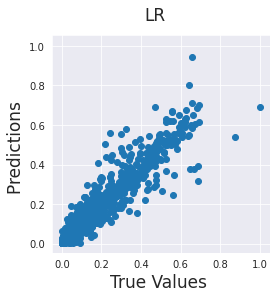

In [49]:
modelName = "LR"    #<--------------------
Arr = []
linear_model, _time, _cv = train_model_linear (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(linear_model, X_train, y_train) #<-----------
res2= test_model(linear_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_linear_train = res[-1]            #<--------------------
y_pred_linear_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_linear_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

Time_Train              57.627809
CV_5                     0.901118
R2_Score_Train                1.0
RMSE_Train                    0.0
MAE_Train                     0.0
MdAE_Train                    0.0
MAPE_Train               0.000417
R2_Score_Test            0.857725
RMSE_Test                 0.05419
MAE_Test                 0.028905
MdAE_Test                0.012953
MAPE_Test         40768628.198199
Name: DT, dtype: object


Text(0.5, 0.98, 'DT')

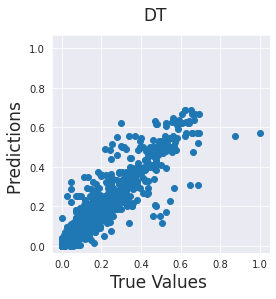

In [50]:
modelName = "DT"    #<--------------------
Arr = []
dt_model, _time, _cv = train_dt(X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(dt_model, X_train, y_train) #<-----------
res2= test_model(dt_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_dt_train = res[-1]         #<--------------------
y_pred_dt_test = res2[-1]         #<--------------------

df_results.loc[modelName] = Arr
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_dt_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

Time_Train             1086.107788
CV_5                      0.967378
R2_Score_Train            0.987042
RMSE_Train                0.016033
MAE_Train                 0.008747
MdAE_Train                0.004016
MAPE_Train                 0.63576
R2_Score_Test             0.927641
RMSE_Test                 0.038646
MAE_Test                  0.020548
MdAE_Test                 0.010243
MAPE_Test         463548238.926792
Name: RF, dtype: object


Text(0.5, 0.98, 'RF')

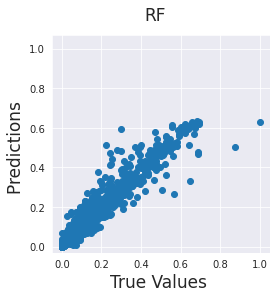

In [51]:
modelName = "RF"    #<--------------------
Arr = []
rf_model, _time, _cv = train_rf(X_train, y_train)   #<---2
Arr.extend([_time, _cv])

res = test_model(rf_model, X_train, y_train) #<-----------
res2= test_model(rf_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_rf_train = res[-1]      #<--------------------
y_pred_rf_test = res2[-1]      #<--------------------

df_results.loc[modelName] = Arr
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_rf_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

Time_Train              14691.206113
CV_5                        0.956164
R2_Score_Train               0.92558
RMSE_Train                  0.038422
MAE_Train                   0.027992
MdAE_Train                  0.020872
MAPE_Train                 38.322522
R2_Score_Test               0.880575
RMSE_Test                   0.049648
MAE_Test                    0.032804
MdAE_Test                   0.020923
MAPE_Test         42162513390.142487
Name: NN, dtype: object


Text(0.5, 0.98, 'NN')

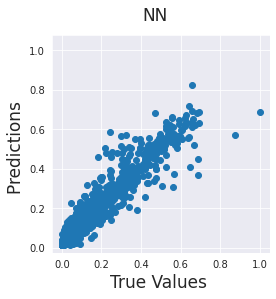

In [52]:
modelName = "NN"    #<--------------------
Arr = []
nn_model, _time, _cv = train_nn (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(nn_model, X_train, y_train) #<-----------
res2= test_model(nn_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_nn_train = res[-1]            #<--------------------
y_pred_nn_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_nn_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

Time_Train               221.765415
CV_5                       0.965966
R2_Score_Train             0.988861
RMSE_Train                 0.014865
MAE_Train                  0.009544
MdAE_Train                 0.005604
MAPE_Train                 2.845367
R2_Score_Test              0.920251
RMSE_Test                  0.040571
MAE_Test                   0.021539
MdAE_Test                  0.010199
MAPE_Test         2831844267.526402
Name: XGB, dtype: object


Text(0.5, 0.98, 'XGB')

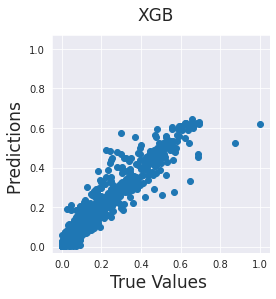

In [53]:
modelName = "XGB"    #<--------------------
Arr = []
xgb_model, _time, _cv = train_xgb (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(xgb_model, X_train, y_train) #<-----------
res2= test_model(xgb_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_xgb_train = res[-1]            #<--------------------
y_pred_xgb_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_xgb_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

/home/openuae/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Time_Train              2186.408429
CV_5                       0.958066
R2_Score_Train             0.979742
RMSE_Train                 0.020046
MAE_Train                  0.012544
MdAE_Train                 0.006495
MAPE_Train                 7.116797
R2_Score_Test              0.913129
RMSE_Test                  0.042344
MAE_Test                   0.022639
MdAE_Test                  0.010596
MAPE_Test         7562480238.411966
Name: GBR, dtype: object


Text(0.5, 0.98, 'GBR')

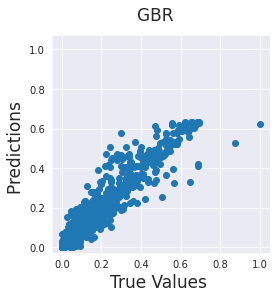

In [54]:
modelName = "GBR"  #<--------------------
Arr = []
GBR_model, _time, _cv = train_GBR (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(GBR_model, X_train, y_train) #<-----------
res2= test_model(GBR_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_GBR_train = res[-1]            #<--------------------
y_pred_GBR_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_GBR_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ig

Text(0.5, 0.98, 'LGB')

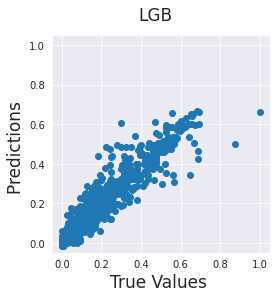

In [55]:
modelName = "LGB"  #<--------------------
Arr = []
LGB_model, _time, _cv = train_LGB (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(LGB_model, X_train, y_train) #<-----------
res2= test_model(LGB_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_LGB_train = res[-1]            #<--------------------
y_pred_LGB_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_LGB_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

# Bias Model

In [57]:
columns_ = ['R2_Score_Train','RMSE_Train','MAE_Train', 'MdAE_Train', 'MAPE_Train',
           'R2_Score_Test','RMSE_Test','MAE_Test', 'MdAE_Test', 'MAPE_Test']
index_=[ "LR", "DT", "RF", "NN", "XGB", "LGB", "GBR", "STK"]
df_modified_results = pd.DataFrame(columns=columns_, index = index_)

## LightGBM

In [59]:
modelName = "LGB" #<-----------------

Arr = []
LGB_Bias = train_bias_model(X_train,  y_pred_LGB_train.reshape(-1,1), y_train)  #<-----------------
res = evaluate(y_train,testAllModel(LGB_model, LGB_Bias, X_train, y_train)) #<-----------------
y_pred_lgb_bias  =   testAllModel(LGB_model, LGB_Bias, X_test, y_test)      #<----------------- 
res2 = evaluate(y_test,y_pred_lgb_bias)                                     #<-----------------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (4001, 1)
testAllModel   (4001,) (4001, 1) (4001,)
R2_score:  0.9672300926088309 RMSE:  0.02549594418244205 MAE:  0.01589621614877209 MED_AE:  0.009747837568955545 MAPE:  15.615754612389825
testAllModel   (1715,) (1715, 1) (1715,)
R2_score:  0.9147670021230891 RMSE:  0.04194291010913257 MAE:  0.02406135765090769 MED_AE:  0.012684362750173914 MAPE:  14985385506.822075
R2_Score_Train               0.96723
RMSE_Train                  0.025496
MAE_Train                   0.015896
MdAE_Train                  0.009748
MAPE_Train                 15.615755
R2_Score_Test               0.914767
RMSE_Test                   0.041943
MAE_Test                    0.024061
MdAE_Test                   0.012684
MAPE_Test         14985385506.822075
Name: LGB, dtype: object


In [61]:
modelName = "GBR" #<-----------------

Arr = []
GBR_Bias = train_bias_model(X_train,  y_pred_GBR_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(GBR_model, GBR_Bias, X_train, y_train)) #<---------2--------
y_pred_GBR_bias  =   testAllModel(GBR_model, GBR_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_GBR_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (4001, 1)
testAllModel   (4001,) (4001, 1) (4001,)
R2_score:  0.979489280548537 RMSE:  0.020170837925874555 MAE:  0.012922815650417568 MED_AE:  0.0070131412646668445 MAPE:  12.911838643940632
testAllModel   (1715,) (1715, 1) (1715,)
R2_score:  0.9126365337969368 RMSE:  0.04246387335708279 MAE:  0.022812751130734846 MED_AE:  0.010169169267070594 MAPE:  13898277252.03683
R2_Score_Train              0.979489
RMSE_Train                  0.020171
MAE_Train                   0.012923
MdAE_Train                  0.007013
MAPE_Train                 12.911839
R2_Score_Test               0.912637
RMSE_Test                   0.042464
MAE_Test                    0.022813
MdAE_Test                   0.010169
MAPE_Test         13898277252.036831
Name: GBR, dtype: object


In [62]:
modelName = "XGB" #<-----------------

Arr = []
xgb_Bias = train_bias_model(X_train,  y_pred_xgb_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(xgb_model, xgb_Bias, X_train, y_train)) #<---------2--------
y_pred_xgb_bias  =   testAllModel(xgb_model, xgb_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_xgb_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (4001, 1)
testAllModel   (4001,) (4001, 1) (4001,)
R2_score:  0.9885709653795915 RMSE:  0.015056993633976947 MAE:  0.009888695109404473 MED_AE:  0.005993025284137393 MAPE:  8.799491007751136
testAllModel   (1715,) (1715, 1) (1715,)
R2_score:  0.9197755591398898 RMSE:  0.040691905484625056 MAE:  0.021764308451510395 MED_AE:  0.010056083150466006 MAPE:  9346188400.403015
R2_Score_Train             0.988571
RMSE_Train                 0.015057
MAE_Train                  0.009889
MdAE_Train                 0.005993
MAPE_Train                 8.799491
R2_Score_Test              0.919776
RMSE_Test                  0.040692
MAE_Test                   0.021764
MdAE_Test                  0.010056
MAPE_Test         9346188400.403015
Name: XGB, dtype: object


In [63]:
modelName = "LR" #<-----------------

Arr = []
linear_Bias = train_bias_model(X_train,  y_pred_linear_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(linear_model, linear_Bias, X_train, y_train)) #<---------2--------
y_pred_linear_bias  =   testAllModel(linear_model, linear_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_linear_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (4001, 1)
testAllModel   (4001, 1) (4001, 1) (4001,)
R2_score:  0.9490552424716663 RMSE:  0.03178946671290344 MAE:  0.017266987041086555 MED_AE:  0.00857780959177161 MAPE:  8.52943039277106
testAllModel   (1715, 1) (1715, 1) (1715,)
R2_score:  0.9004868077864707 RMSE:  0.045320532767968304 MAE:  0.024040506972820747 MED_AE:  0.011096760248550414 MAPE:  8525878549.68132
R2_Score_Train            0.949055
RMSE_Train                0.031789
MAE_Train                 0.017267
MdAE_Train                0.008578
MAPE_Train                 8.52943
R2_Score_Test             0.900487
RMSE_Test                 0.045321
MAE_Test                  0.024041
MdAE_Test                 0.011097
MAPE_Test         8525878549.68132
Name: LR, dtype: object


In [64]:
modelName = "DT" #<-----------------

Arr = []
dt_Bias = train_bias_model(X_train,  y_pred_dt_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(dt_model, dt_Bias, X_train, y_train)) #<---------2--------
y_pred_dt_bias  =   testAllModel(dt_model, dt_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_dt_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (4001, 1)
testAllModel   (4001,) (4001, 1) (4001,)
R2_score:  0.9996796338850608 RMSE:  0.002520906743128063 MAE:  0.002520906738936901 MED_AE:  0.002520906738936901 MAPE:  6.087094480726822
testAllModel   (1715,) (1715, 1) (1715,)
R2_score:  0.8576648152525478 RMSE:  0.05420143844121404 MAE:  0.028945136411832467 MED_AE:  0.012770029256797544 MAPE:  6660683881.960691
R2_Score_Train              0.99968
RMSE_Train                 0.002521
MAE_Train                  0.002521
MdAE_Train                 0.002521
MAPE_Train                 6.087094
R2_Score_Test              0.857665
RMSE_Test                  0.054201
MAE_Test                   0.028945
MdAE_Test                   0.01277
MAPE_Test         6660683881.960691
Name: DT, dtype: object


In [65]:
modelName = "RF" #<-----------------

Arr = []
rf_Bias = train_bias_model(X_train,  y_pred_rf_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(rf_model, rf_Bias, X_train, y_train)) #<---------2--------
y_pred_rf_bias  =   testAllModel(rf_model, rf_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_rf_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (4001, 1)
testAllModel   (4001,) (4001, 1) (4001,)
R2_score:  0.9870055751259834 RMSE:  0.016055063365658012 MAE:  0.009122302085514235 MED_AE:  0.004497884495696866 MAPE:  6.267912386103447
testAllModel   (1715,) (1715, 1) (1715,)
R2_score:  0.9294398445223981 RMSE:  0.038162291293370426 MAE:  0.02059537931592181 MED_AE:  0.01014582178159755 MAPE:  6623332446.723015
R2_Score_Train             0.987006
RMSE_Train                 0.016055
MAE_Train                  0.009122
MdAE_Train                 0.004498
MAPE_Train                 6.267912
R2_Score_Test               0.92944
RMSE_Test                  0.038162
MAE_Test                   0.020595
MdAE_Test                  0.010146
MAPE_Test         6623332446.723015
Name: RF, dtype: object


In [66]:
modelName = "NN" #<-----------------

Arr = []
nn_Bias = train_bias_model(X_train,  y_pred_nn_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(nn_model, nn_Bias, X_train, y_train)) #<---------2--------
y_pred_nn_bias  =   testAllModel(nn_model, nn_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_nn_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (4001, 1)
testAllModel   (4001,) (4001, 1) (4001,)
R2_score:  0.9510966465823455 RMSE:  0.031146038279083 MAE:  0.017847273503862553 MED_AE:  0.009160459878494426 MAPE:  11.789944565755455
testAllModel   (1715,) (1715, 1) (1715,)
R2_score:  0.9082150608641111 RMSE:  0.043525161353719685 MAE:  0.024379197510729093 MED_AE:  0.012199987119448585 MAPE:  13134645164.79128
R2_Score_Train              0.951097
RMSE_Train                  0.031146
MAE_Train                   0.017847
MdAE_Train                   0.00916
MAPE_Train                 11.789945
R2_Score_Test               0.908215
RMSE_Test                   0.043525
MAE_Test                    0.024379
MdAE_Test                     0.0122
MAPE_Test         13134645164.791281
Name: NN, dtype: object


In [67]:
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
# n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1, random_state=42

def train_STK(X_train, y_train):
    estimators = [('Randomforest',  create_rf()),
              ('XGB', create_xgb()),
              ('LGB', create_LGB())]   
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)   
    final_estimator = GradientBoostingRegressor(
        n_estimators =100,
        max_leaf_nodes=15,
        max_depth=3,
        learning_rate= 0.05) 
    
    
    model_stk = StackingRegressor(
        estimators=estimators,
        final_estimator=final_estimator,
    #    cv = cv_model
    )
    start = timeit.default_timer() ##
    model_stk.fit(X_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_=(stop - start)*1000 ##    
    
    cv_model = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
    cv = cross_val_score(estimator = model_stk, X = X_train, y = y_train.ravel(), cv = cv_model)
    cv= cv.mean()
    return  model_stk, time_, cv


"""
{'final_estimator__n_estimators': 100,
 'final_estimator__max_leaf_nodes': 15,
 'final_estimator__max_depth': 3,
 'final_estimator__learning_rate': 0.05}
"""

"\n{'final_estimator__n_estimators': 100,\n 'final_estimator__max_leaf_nodes': 15,\n 'final_estimator__max_depth': 3,\n 'final_estimator__learning_rate': 0.05}\n"

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ig

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ig

Text(0.5, 0.98, 'STK')

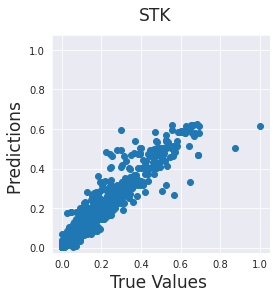

In [68]:
modelName = "STK"  #<--------------------
Arr = []
STK_model, _time, _cv = train_STK (X_train, y_train)   #<---
Arr.extend([_time, _cv])

res = test_model(STK_model, X_train, y_train) #<-----------
res2= test_model(STK_model, X_test, y_test)   #<-----------
  
Arr.extend(res[:-1])
Arr.extend(res2[:-1])
y_pred_STK_train = res[-1]            #<--------------------
y_pred_STK_test = res2[-1]            #<--------------------

df_results.loc[modelName] = Arr   
print(df_results.loc[modelName])

plt.scatter(y_test, y_pred_STK_test) #<--------------------
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle(modelName, fontsize=17)

In [69]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

param_grid = {
    "final_estimator__n_estimators" : [1, 50, 100, 200, 500],
    "final_estimator__max_leaf_nodes" :[2, 5, 10, 15,20], 
    "final_estimator__max_depth" :[1,3,6,10,15,20], 
    "final_estimator__learning_rate" :[0.001,0.005, 0.01,0.05,0.1, 0.5] 
}

#cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

clf = RandomizedSearchCV(model_stk, param_grid, random_state= False, verbose=3, cv = 5)
search = clf.fit(X_train, y_train.ravel())
search.best_params_



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] 

[CV 5/5] END final_estimator__learning_rate=0.05, final_estimator__max_depth=3, final_estimator__max_leaf_nodes=15, final_estimator__n_estimators=100; total time=   5.4s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [

[CV 5/5] END final_estimator__learning_rate=0.001, final_estimator__max_depth=20, final_estimator__max_leaf_nodes=15, final_estimator__n_estimators=50; total time=   5.3s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] 

[CV 5/5] END final_estimator__learning_rate=0.01, final_estimator__max_depth=15, final_estimator__max_leaf_nodes=5, final_estimator__n_estimators=500; total time=   6.6s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [

[CV 5/5] END final_estimator__learning_rate=0.001, final_estimator__max_depth=3, final_estimator__max_leaf_nodes=5, final_estimator__n_estimators=50; total time=   5.2s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [W

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ig

[CV 5/5] END final_estimator__learning_rate=0.05, final_estimator__max_depth=20, final_estimator__max_leaf_nodes=15, final_estimator__n_estimators=200; total time=   6.2s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] 

[CV 5/5] END final_estimator__learning_rate=0.5, final_estimator__max_depth=15, final_estimator__max_leaf_nodes=20, final_estimator__n_estimators=200; total time=   6.3s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [

[CV 5/5] END final_estimator__learning_rate=0.01, final_estimator__max_depth=10, final_estimator__max_leaf_nodes=20, final_estimator__n_estimators=500; total time=   7.3s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] 

[CV 5/5] END final_estimator__learning_rate=0.01, final_estimator__max_depth=15, final_estimator__max_leaf_nodes=5, final_estimator__n_estimators=50; total time=   5.2s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [W

[CV 5/5] END final_estimator__learning_rate=0.005, final_estimator__max_depth=15, final_estimator__max_leaf_nodes=20, final_estimator__n_estimators=100; total time=   5.5s
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM]

{'final_estimator__n_estimators': 100,
 'final_estimator__max_leaf_nodes': 15,
 'final_estimator__max_depth': 3,
 'final_estimator__learning_rate': 0.05}

In [69]:
modelName = "STK" #<-----------------

Arr = []
STK_Bias = train_bias_model(X_train,  y_pred_STK_train.reshape(-1,1), y_train)  #<-------2----------
res = evaluate(y_train,testAllModel(STK_model, STK_Bias, X_train, y_train)) #<---------2--------
y_pred_STK_bias  =   testAllModel(STK_model, STK_Bias, X_test, y_test)      #<----------3------- 
res2 = evaluate(y_test,y_pred_STK_bias)                                     #<----------1-------
Arr.extend(res)
Arr.extend(res2)
df_modified_results.loc[modelName] = Arr   
print(df_modified_results.loc[modelName])

train_bias_model - Shape of new y_pred (4001, 1)
testAllModel   (4001,) (4001, 1) (4001,)
R2_score:  0.9863725501612273 RMSE:  0.01644147546430401 MAE:  0.009790881995866233 MED_AE:  0.005585823248479713 MAPE:  17.088459584912727
testAllModel   (1715,) (1715, 1) (1715,)
R2_score:  0.9259557681770461 RMSE:  0.039093116486386956 MAE:  0.02133023488867746 MED_AE:  0.010285649745057607 MAPE:  18587594145.530266
R2_Score_Train              0.986373
RMSE_Train                  0.016441
MAE_Train                   0.009791
MdAE_Train                  0.005586
MAPE_Train                  17.08846
R2_Score_Test               0.925956
RMSE_Test                   0.039093
MAE_Test                     0.02133
MdAE_Test                   0.010286
MAPE_Test         18587594145.530266
Name: STK, dtype: object


In [70]:
df_results.to_csv("results_Regression_ordered_models.csv", sep=',')
df_results.sort_values('R2_Score_Test')

,Time_Train,CV_5,R2_Score_Train,RMSE_Train,MAE_Train,MdAE_Train,MAPE_Train,R2_Score_Test,RMSE_Test,MAE_Test,MdAE_Test,MAPE_Test
DT,57.627809,0.901118,1.0,0.0,0.0,0.0,0.000417,0.857725,0.05419,0.028905,0.012953,40768628.198199
NN,14691.206113,0.956164,0.92558,0.038422,0.027992,0.020872,38.322522,0.880575,0.049648,0.032804,0.020923,42162513390.142487
LR,13.004987,0.954363,0.948055,0.0321,0.017019,0.008142,4.066573,0.899374,0.045573,0.023925,0.010854,4077701150.066055
LGB,38.763125,0.947931,0.966977,0.025594,0.015816,0.009427,10.665503,0.912654,0.04246,0.024216,0.01304,8616182026.020533
GBR,2186.408429,0.958066,0.979742,0.020046,0.012544,0.006495,7.116797,0.913129,0.042344,0.022639,0.010596,7562480238.411966
XGB,221.765415,0.965966,0.988861,0.014865,0.009544,0.005604,2.845367,0.920251,0.040571,0.021539,0.010199,2831844267.526402
STK,7288.092152,0.962552,0.986055,0.016632,0.009526,0.004599,11.162127,0.923353,0.039774,0.021367,0.010278,12112487543.175819
RF,1086.107788,0.967378,0.987042,0.016033,0.008747,0.004016,0.63576,0.927641,0.038646,0.020548,0.010243,463548238.926792


In [71]:
df_modified_results.to_csv("results_Regression_ordered_models2.csv", sep=',')
df_modified_results

,R2_Score_Train,RMSE_Train,MAE_Train,MdAE_Train,MAPE_Train,R2_Score_Test,RMSE_Test,MAE_Test,MdAE_Test,MAPE_Test
LR,0.949055,0.031789,0.017267,0.008578,8.52943,0.900487,0.045321,0.024041,0.011097,8525878549.68132
DT,0.99968,0.002521,0.002521,0.002521,6.087094,0.857665,0.054201,0.028945,0.01277,6660683881.960691
RF,0.987006,0.016055,0.009122,0.004498,6.267912,0.92944,0.038162,0.020595,0.010146,6623332446.723015
NN,0.951097,0.031146,0.017847,0.00916,11.789945,0.908215,0.043525,0.024379,0.0122,13134645164.791281
XGB,0.988571,0.015057,0.009889,0.005993,8.799491,0.919776,0.040692,0.021764,0.010056,9346188400.403015
LGB,0.96723,0.025496,0.015896,0.009748,15.615755,0.914767,0.041943,0.024061,0.012684,14985385506.822075
GBR,0.979489,0.020171,0.012923,0.007013,12.911839,0.912637,0.042464,0.022813,0.010169,13898277252.036831
STK,0.986373,0.016441,0.009791,0.005586,17.08846,0.925956,0.039093,0.02133,0.010286,18587594145.530266


In [72]:
df = pd.DataFrame(y_test, columns = ["y_test"])
df['y_test']  = y_test
df["y_pred_linear_test"]  = y_pred_linear_test
df["y_pred_dt_test"] = y_pred_dt_test
df["y_pred_rf_test"] = y_pred_rf_test
df["y_pred_nn_test"] = y_pred_nn_test
df["y_pred_LGB_model_test"] = y_pred_LGB_test
df["y_pred_GBR_model_test"] = y_pred_GBR_test
df["y_pred_xgb_test"] = y_pred_xgb_test
df["y_pred_STK_test"] = y_pred_STK_test

df.to_csv("Ordered_allModels_Ytest_Ypredict_model.csv")

In [73]:
df = pd.DataFrame(y_test, columns = ["y_test"])
df['y_test']  = y_test
df["y_pred_linear_test"]  = y_pred_linear_bias
df["y_pred_dt_test"] = y_pred_dt_bias
df["y_pred_rf_test"] = y_pred_rf_bias
df["y_pred_nn_test"] = y_pred_nn_bias
df["y_pred_Lgb_model_test"] = y_pred_lgb_bias
df["y_pred_GBR_model_test"] = y_pred_GBR_bias
df["y_pred_XGboost_test"] = y_pred_xgb_bias
df["y_pred_STK_test"] = y_pred_STK_bias


df.to_csv("Ordered_allModels_Ytest_Ypredict_model2.csv")